# Unsupervised Machine Learning

## K-Mean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('driver-data.csv')

In [3]:
data

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [4]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
feature=data.drop('id',axis=1)

In [8]:
feature

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [9]:
kmean=KMeans(n_clusters=5)

In [10]:
cluster=kmean.fit(feature)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
cluster

KMeans(n_clusters=5)

In [12]:
cluster.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4])

In [14]:
a=cluster.cluster_centers_

In [15]:
data['cluster']=cluster.labels_

In [16]:
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [17]:
data[data['cluster']==1]

,id,mean_dist_day,mean_over_speed_perc,cluster
3206,3423313932,199.81,32,1
3213,3423313466,211.36,5,1
3215,3423311847,208.47,26,1
3220,3423311045,186.28,4,1
3241,3423313048,162.56,23,1
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [18]:
data[data['cluster']==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
5,3423313857,41.91,10,2
9,3423312488,44.31,19,2
27,3423312113,45.75,16,2
42,3423311369,37.41,21,2
45,3423312047,46.97,13,2
...,...,...,...,...
3190,3423313743,49.22,8,2
3195,3423312761,47.56,5,2
3196,3423314346,39.39,8,2
3197,3423313451,46.85,7,2


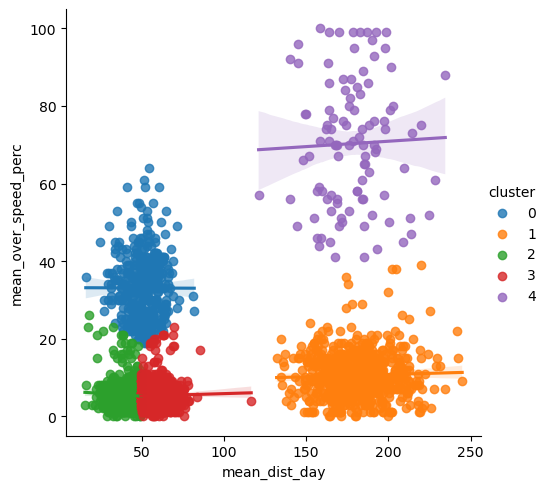

In [19]:
sns.lmplot(data=data,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

# Optimum Value of cluster

In [20]:
cluster.inertia_

534648.8065571408

In [21]:
inertia=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(feature)
    inertia.append(kmean.inertia_)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [22]:
inertia

[12184626.12962798,
 1316420.8509477177,
 992634.0606702471,
 719601.5383469043,
 534645.1796640705,
 372837.2032720924,
 319990.22146236256,
 276893.9655749879,
 254319.15424853197,
 230078.2170453572]

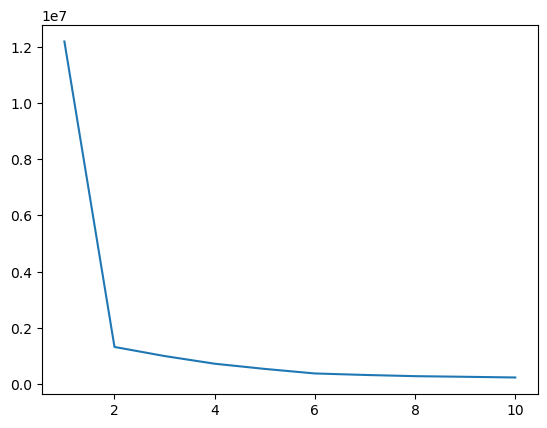

In [23]:
plt.plot(range(1,11),inertia)

Text(0.5, 1.0, 'optimum value of k')

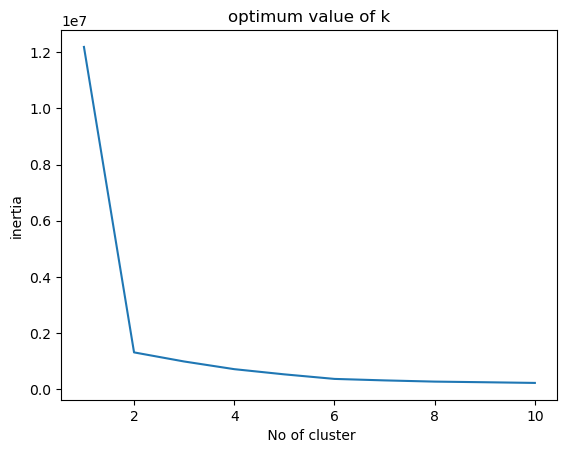

In [24]:
plt.plot(range(1,11),inertia)
plt.xlabel(' No of cluster')
plt.ylabel('inertia')
plt.title('optimum value of k')

# Hieraarchical Clusters

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [26]:
data=pd.read_csv('zoo.csv')

In [27]:
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [28]:
features=data.drop(['animal_name','class_type'],axis=1)

In [29]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


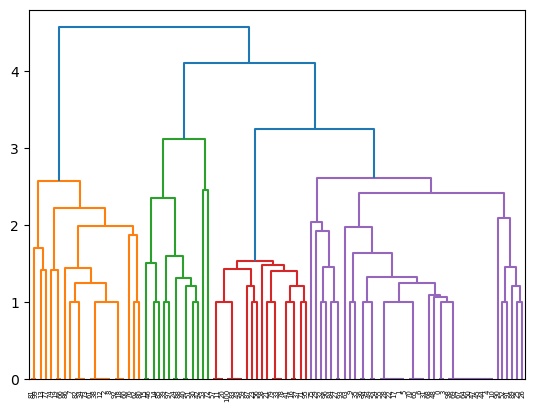

In [30]:
dendogram=sch.dendrogram(sch.linkage(features,method='average'))

In [31]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [32]:
cluster=agg.fit(features)

In [33]:
cluster

AgglomerativeClustering()

In [34]:
cluster.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
np.unique(cluster.labels_)

array([0, 1], dtype=int64)

In [36]:
silhouette_score(features,cluster.labels_)

0.4081390258000622

# DBSCAN

In [38]:
data=pd.read_csv('DB_dataset.csv')

In [39]:
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [51]:
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [54]:
new_data=pd.DataFrame(std_scl.fit_transform(data))

In [55]:
new_data

,0,1
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


In [56]:
new_data=pd.DataFrame(std_scl.fit_transform(data),columns=data.columns)

In [57]:
new_data

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


In [58]:
from sklearn.cluster import DBSCAN

In [66]:
min_node=range(1,11)
eps=(0.1,0.2,0.3,0.4,0.5,0.6)

In [85]:
output=[]
for mn in min_node:
    for ep in eps:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(new_data).labels_
        score= silhouette_score(new_data,labels)
        output.append([ep,mn,score])

In [86]:
print(output)

[[0.1, 1, -0.04299681057231643], [0.2, 1, 0.4246458392966885], [0.3, 1, 0.6636830126381724], [0.4, 1, 0.6636830126381724], [0.5, 1, 0.6636830126381724], [0.6, 1, 0.6636830126381724], [0.1, 2, 0.2832200472847609], [0.2, 2, 0.4246458392966885], [0.3, 2, 0.6636830126381724], [0.4, 2, 0.6636830126381724], [0.5, 2, 0.6636830126381724], [0.6, 2, 0.6636830126381724], [0.1, 3, 0.42737747491884875], [0.2, 3, 0.4246458392966885], [0.3, 3, 0.6636830126381724], [0.4, 3, 0.6636830126381724], [0.5, 3, 0.6636830126381724], [0.6, 3, 0.6636830126381724], [0.1, 4, 0.5359027025302264], [0.2, 4, 0.6793428586100531], [0.3, 4, 0.6636830126381724], [0.4, 4, 0.6636830126381724], [0.5, 4, 0.6636830126381724], [0.6, 4, 0.6636830126381724], [0.1, 5, 0.4827750201294571], [0.2, 5, 0.6791715296437162], [0.3, 5, 0.41849097827454546], [0.4, 5, 0.6636830126381724], [0.5, 5, 0.6636830126381724], [0.6, 5, 0.6636830126381724], [0.1, 6, 0.4076103765285375], [0.2, 6, 0.6811897093459002], [0.3, 6, 0.41849097827454546], [0.4

In [87]:
len(output)

60

In [89]:
a=pd.DataFrame(output)

In [90]:
a

,0,1,2
0,0.1,1,-0.042997
1,0.2,1,0.424646
2,0.3,1,0.663683
3,0.4,1,0.663683
4,0.5,1,0.663683
5,0.6,1,0.663683
6,0.1,2,0.283220
7,0.2,2,0.424646
8,0.3,2,0.663683
9,0.4,2,0.663683


In [91]:
a.loc[:,2].max()

0.6811897093459002

In [93]:
a[a[2]==0.6811897093459002]

,0,1,2
31,0.2,6,0.68119
37,0.2,7,0.68119
43,0.2,8,0.68119


In [94]:
labels=DBSCAN(eps=0.2,min_samples=6).fit(new_data).labels_

In [95]:
labels

array([ 0,  0,  1,  1,  0,  1,  1,  1,  1,  2,  1,  0,  1,  2,  1,  1,  0,
        1,  2,  1,  1,  0,  1,  2,  1,  2,  0,  1,  2,  1,  1,  1,  0,  1,
        1, -1,  2,  1,  2,  0,  2,  1,  1,  0,  1,  0,  1,  1,  0,  0,  2,
        2,  1,  1,  1,  1,  1,  2,  2,  0,  0,  2,  0,  0,  0,  1,  1,  0,
        1,  1,  2,  1,  2,  0,  2,  0,  1,  1,  1,  1,  2,  1,  2,  1,  1,
        1,  2,  2,  0,  2,  2,  2,  0,  2,  1,  1,  0,  0,  0,  1,  2,  2,
        0,  2,  1,  1,  1,  0,  1,  2,  2,  1,  2,  2,  0,  2,  0,  1,  1,
        0,  1,  2,  0,  0,  2,  0,  0,  0,  0,  2,  1,  2,  1,  2,  2,  2,
        1,  0,  1,  1,  0,  0,  0,  0,  1,  2,  1,  1,  1,  2,  2,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1, -1,  1,  2,  1,
        0,  2,  0,  1,  1,  2,  1,  2,  2,  2,  0,  0,  0,  1,  1,  2,  1,
        0,  1,  2,  0,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  2,  2,  2,  1,
        0,  1,  2,  1,  0

In [97]:
import seaborn as sns

<Axes: xlabel='Weight', ylabel='Height'>

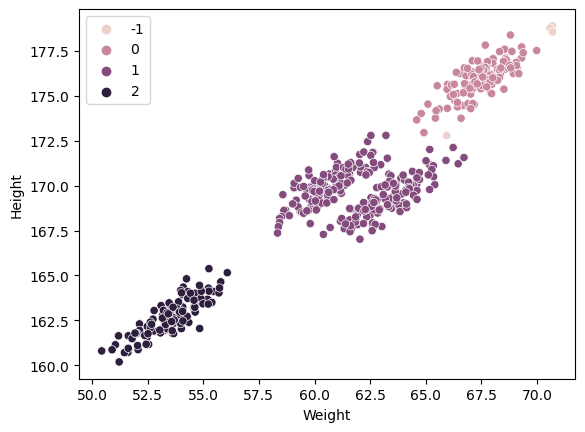

In [99]:
sns.scatterplot(data=data,x='Weight',y='Height',hue=labels)